# 8.1 Simulated Annealing (5 points)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Initialization

# Parameters
bs = [0.05, 0.02, 0.001, 0.1]
l = 1.1
tmax = 50
M = 10 # try also 500
N = 6

# random parameters
s_sa = np.random.choice([-1,1],N)
W = np.random.rand(6,6)
for i in range(0,N):
    W[i,i] = 0
    
# Make W symmetric
W = (W + W.T)/2

# function

In [15]:
beta = np.zeros(tmax)
energy = np.zeros(tmax)
probabilities = {}

In [16]:
def compute_energy(s,W):
    energy = 0
    for i in range(0,N):
        for j in range(0,N):
            energy = energy + W[i,j]*s[i]*s[j]
    return -0.5*energy

In [17]:
for orig_b in bs:
    b = orig_b
    for t in range(0,tmax):
        for m in range(0,M):
            # select random node
            i = np.random.choice(N,1)
            e = 0
            for j in range(0,N):
                if j!=i:
                    e = e + W[i,j]*s_sa[i]*s_sa[j]
            e = -0.5*e
            delta_e = -2*e
            if 1/(1+np.exp(b*delta_e) > 0.5):
                s_sa[i] = s_sa[i]*-1
            energy[t] = compute_energy(s_sa, W)
        beta[t] = b
        b = l*b
    probabilities[orig_b] = np.exp(-b * energy[tmax-1])
    
print(s_sa)

[-1 -1 -1 -1 -1  1]


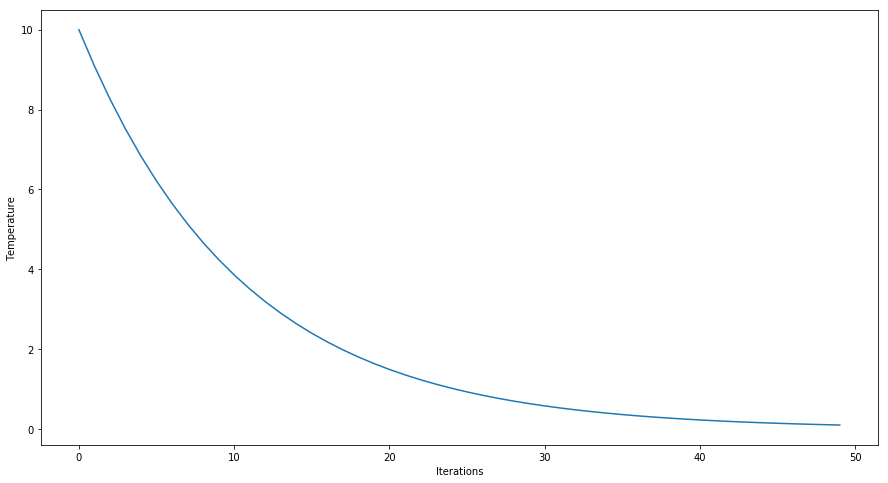

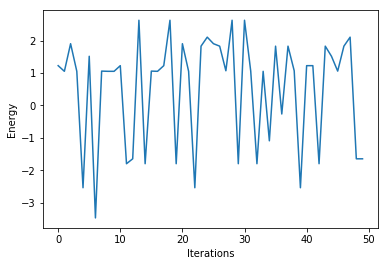

In [18]:
# Plot Temperature and Energy over time

T = 1./beta

plt.figure(figsize=(15,8))

plt.plot(T, label="Temperature")
plt.ylabel("Temperature")
plt.xlabel("Iterations")
plt.show()

plt.figure()
plt.plot(energy, label="Energy")
plt.ylabel("Energy")
plt.xlabel("Iterations")
plt.show()

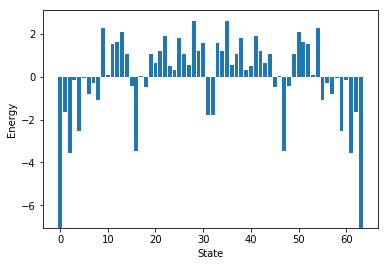

In [19]:
# Plot Energy for all State Combinations

state_energies = []

def state_combinations(n):
    if n == 1:
        return [[-1], [1]]
    else:
        res = []
        for sc in state_combinations(n-1):
            res.append(sc + [-1])
            res.append(sc + [1])
        return res

Zs = {b: 0 for b in bs}
for sc in state_combinations(6):
    sc = np.array(sc)
    sc_i = sc[:, np.newaxis]
    sc_j = sc[np.newaxis, :]
    energy = np.sum(-0.5 * sc_i * sc_j * W)
    
    state_energies.append(energy)
    
    for b in bs:
        Zs[b] += np.exp(-b*energy)

plt.bar(np.arange(len(state_energies)), state_energies)
plt.ylabel("Energy")
plt.xlabel("State")
plt.show()

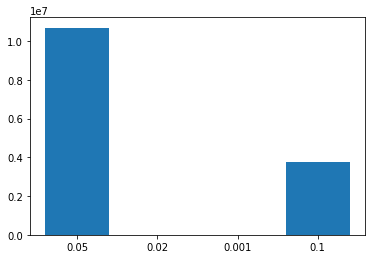

In [20]:
# Plot probabilities for different b's

for b in bs:
    probabilities[b] = probabilities[b] / Zs[b]

plt.figure()
plt.bar(range(len(probabilities)), probabilities.values(), align='center')
plt.xticks(range(len(probabilities)), probabilities.keys())

plt.show()

In [21]:
probabilities

{0.001: 0.018954297818677409,
 0.02: 3.2936747749024128e-05,
 0.05: 10688198.877145613,
 0.1: 3741461.7350716209}

## 8.2

In [28]:
# Initialization

b = 0.05
l = 1.1
tmax = 50

eta = 0.01

s_mfa = np.random.choice([-1, 1], 6)

#print("s before", s_mfa)


beta = np.zeros(tmax)
energy = np.zeros(tmax)

for t in range(tmax):
    step = 0
    e_old = np.zeros(N)
    e_new = np.zeros(N)
    #print("s", s_mfa)
    while True:
        #print("e_old at start", e_old)
        for i in range(N):
            e_new[i] = 0
            for j in range(N):
                if i != j:
                    e_new[i] -= W[i, j] * s_mfa[j]
            new_s_i = -1 if np.tanh(-b*e_new[i]) > 0 else 1
            # if s_mfa[i] != new_s_i:
            #     print("state changed")
            s_mfa[i] = new_s_i
        
        if np.linalg.norm(e_new - e_old) < eta:
            #print("breaking at step ", step)
            #print("norm", np.linalg.norm(e_new - e_old))
            #print("e_old", e_old)
            #print("e_new", e_new)
            break
        else:
            #print(np.linalg.norm(e_new - e_old))
            #print("e_old", e_old)
            #print("e_new", e_new)
            step += 1
            e_old = np.copy(e_new)
    energy[t] = compute_energy(s_mfa, W)
    beta[t] = b
    b = l * b

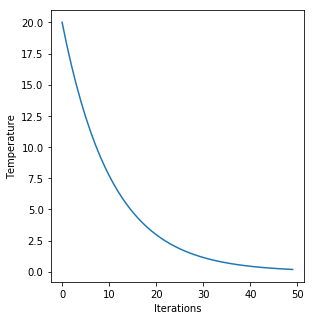

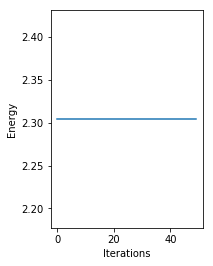

In [29]:
 # Plot Temperature and Energy over time

T = 1./beta

plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(T, label="Temperature")
plt.ylabel("Temperature")
plt.xlabel("Iterations")
plt.show()

plt.subplot(122)
plt.plot(energy, label="Energy")
plt.ylabel("Energy")
plt.xlabel("Iterations")
plt.show()

In [30]:
print(s_sa)
print(s_mfa)

[-1 -1 -1 -1 -1  1]
[-1 -1  1 -1 -1  1]
